In [26]:
import pandas as pd
import csv
import requests

# data file names gotten by navigating via aoos portal to files, then copy link
# still good?
hdrfile = 'https://workspace.aoos.org/published/file/6be0d8f6-5ddc-4ad9-90d3-8a63d5d58752/TXS12.hdr'
datafile = 'https://workspace.aoos.org/published/file/62874c7d-d4ac-4d59-b349-cc402d872d7f/TXS12.ascii'

def count_header_lines(datafile):
    # funky file with variable header at top.  Count the header rows.
    nhdr=0
    with requests.Session() as s:
        download = s.get(datafile)

        decoded_content = download.content.decode('utf-8')

        cr = csv.reader(decoded_content.splitlines(), delimiter=',')
        my_list = list(cr)
        for row in my_list:
            nhdr+=1
            if row[0].find('END')>1:  # Warning: I've seen cases with "END" in station name
                #print(row[0])
                break
    return(nhdr)

nhdr = count_header_lines(datafile)
print(nhdr)


364


In [27]:
def load_data(datafile):
    # read in the data
    # there are 30 columns whose names should be generated from the header. hardcode for now. 
    colnames = [ 'id', 'pressure', 'temperature', 'temperature2', 'conductivity','conductivity2', 
           'v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7',
           'fluorescence', 'beam_trans', 'oxygen', 
           'altimeter', 'latitude', 'longitude', 'density', 'density2',
           'salinity', 'salinity2', 'nbin', 'flag']
    nhdr = count_header_lines(datafile)
    data = pd.read_table(datafile, skiprows=nhdr, names=colnames, delim_whitespace=True)
    return data

data= load_data(datafile)
data.dtypes
data.head()

,id,pressure,temperature,temperature2,conductivity,conductivity2,v0,v1,v2,v3,...,oxygen,altimeter,latitude,longitude,density,density2,salinity,salinity2,nbin,flag
0,1,0.0,4.5834,4.5544,2.974495,2.969143,0.2809,0.0005,4.2153,0.0,...,5.38263,98.65,60.01936,-149.35476,24.6407,24.6161,31.1159,31.0814,38,1.0
1,1,1.0,4.5834,4.5544,2.974495,2.969143,0.2809,0.0005,4.2153,0.0,...,5.38263,98.65,60.01936,-149.35476,24.6407,24.6161,31.1159,31.0814,38,1.0
2,1,2.0,4.5834,4.5544,2.974495,2.969143,0.2809,0.0005,4.2153,0.0,...,5.38263,98.65,60.01936,-149.35476,24.6407,24.6161,31.1159,31.0814,38,0.0
3,1,3.0,4.5292,4.5409,2.970221,2.969614,0.2992,0.0005,4.2261,0.0,...,5.38030,98.65,60.01936,-149.35476,24.6471,24.6314,31.1170,31.0990,47,0.0
4,1,4.0,4.5027,4.5556,2.968559,2.970330,0.2819,0.0006,4.2225,0.0,...,5.41539,98.65,60.01936,-149.35476,24.6539,24.6252,31.1223,31.0930,27,0.0


In [28]:
def load_header(hdrfile):

    # read in the header files
    hcolnames = [ 'id', 'station', 'date', 'latitude', 'longitude','waterdepth', 
           'filename', 'instrument', 'ship', 'cruise', 'junk1', 'PI', 'purpose',
           'agency', 'region', 'junk2']
    hdata = pd.read_csv(hdrfile, delimiter=',', names=hcolnames)
    hdata = hdata.set_index('id')
    return hdata

hdata = load_header(hdrfile)
hdata.head()


,station,date,latitude,longitude,waterdepth,filename,instrument,ship,cruise,junk1,PI,purpose,agency,region,junk2
id,,,,,,,,,,,,,,,
1,RES2.5,May 04 2012 05:21:55,60.0195,-149.3547,297,TXS12001.cnv,SBE9,R/V Tiglax,TXS12,Hopcroft,Hopcroft,Seward Line Monitoring,NPRB,Gulf of Alaska,n
2,GAK9,May 04 2012 18:51:25,58.6787,-148.3527,278,TXS12002.cnv,SBE9,R/V Tiglax,TXS12,Evans,Hopcroft,Seward Line Monitoring,NPRB,Gulf of Alaska,n
3,GAK9I,May 04 2012 20:20:55,58.6120,-148.2758,686,TXS12003.cnv,SBE9,R/V Tiglax,TXS12,Evans,Hopcroft,Seward Line Monitoring,NPRB,Gulf of Alaska,n
4,GAK10,May 04 2012 21:40:30,58.5105,-148.1742,1100,TXS12004.cnv,SBE9,R/V Tiglax,TXS12,Evans,Hopcroft,Seward Line Monitoring,NPRB,Gulf of Alaska,n
5,GAK11,May 05 2012 00:03:30,58.3943,-148.0750,1500,TXS12005.cnv,SBE9,R/V Tiglax,TXS12,Evans,Hopcroft,Seward Line Monitoring,NPRB,Gulf of Alaska,n


In [29]:
# join these two together so that data are associated with positions
df = pd.merge(data,hdata, on='id')
df['Datetime'] = pd.to_datetime(df['date'])
df = df.drop(columns=['latitude_x','longitude_x'])
df = df.rename(columns={'latitude_y':'Latitude (degrees N)','longitude_y': 'Longitude (degrees W)'})
df.dtypes


id                                int64
pressure                        float64
temperature                     float64
temperature2                    float64
conductivity                    float64
conductivity2                   float64
v0                              float64
v1                              float64
v2                              float64
v3                              float64
v4                              float64
v5                              float64
v6                              float64
v7                              float64
fluorescence                    float64
beam_trans                      float64
oxygen                          float64
altimeter                       float64
density                         float64
density2                        float64
salinity                        float64
salinity2                       float64
nbin                              int64
flag                            float64
station                          object


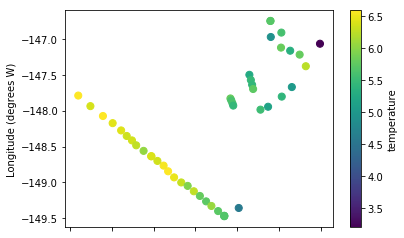

In [30]:
%matplotlib inline
surface = df[df['pressure']==0]
surface.plot.scatter(x='Latitude (degrees N)', y='Longitude (degrees W)', c='temperature', s=50, colormap='viridis')